In [60]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Read in data
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49704 entries, 0 to 49703
Data columns (total 16 columns):
Unnamed: 0      49704 non-null int64
user_id         49704 non-null object
item_id         49704 non-null int64
recommend       49704 non-null int64
review          49680 non-null object
publisher       49699 non-null object
genres          49704 non-null object
app_name        49704 non-null object
title           49704 non-null object
url             49704 non-null object
release_date    49704 non-null object
tags            49704 non-null object
specs           49704 non-null object
price           49704 non-null float64
early_access    49704 non-null bool
developer       49704 non-null object
dtypes: bool(1), float64(1), int64(3), object(11)
memory usage: 5.7+ MB


In [225]:
# Does recommned higher than not recommend
print('percentage of people recommend:'+str(round(((df['recommend'].sum())/49704)*100,2)))
print('percentage of people do not recommend:'+str(round(100-(df['recommend'].sum()/49704*100),2)))

percentage of people recommend:89.41
percentage of people do not recommend:10.59


([<matplotlib.patches.Wedge at 0x15057f39748>,
 [Text(-1.0396823075208497, 0.35925019057492724, 'Recommend'),
  Text(1.0396823243385636, -0.3592501419038861, 'Not Recommend')],
 [Text(-0.567099440465918, 0.19595464940450577, '89.4%'),
  Text(0.5670994496392164, -0.19595462285666512, '10.6%')])

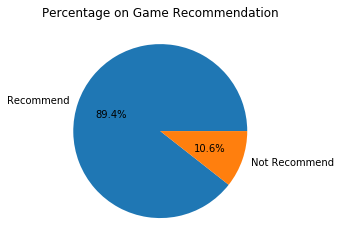

In [262]:
labels='Recommend','Not Recommend'
size=[89.41,10.59]
plt.title('Percentage on Game Recommendation')
plt.pie(size,labels=labels,autopct='%1.1f%%')

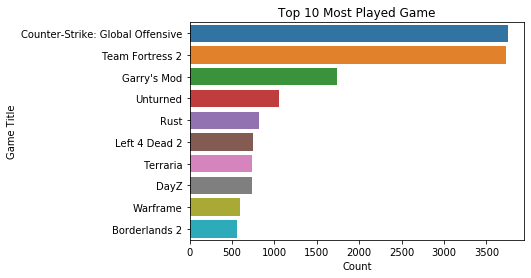

In [108]:
# Most played game 
count=df['title'].value_counts()[0:10]
most_played_game=pd.DataFrame({'Game Title':count.index,'Count':count.values})
plt.title('Top 10 Most Played Game')
sns.barplot(x='Count',y='Game Title',data=most_played_game)

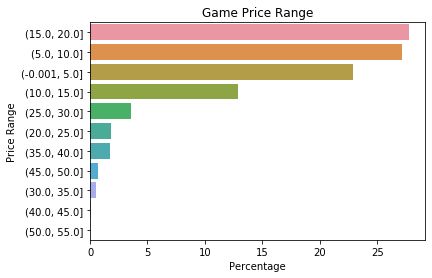

In [222]:
# Price Range of Games
unique_game=df.drop_duplicates(subset=['item_id'])
price_bin=unique_game['price'].value_counts(bins=range(0,60,5))
plt.title('Game Price Range')
plt.xlabel('Percentage')
plt.ylabel('Price Range')
sns.barplot(y=price_bin.index.astype(str),x=(price_bin.values/len(unique_game))*100)

([<matplotlib.patches.Wedge at 0x1505802b608>,
 [Text(-1.082387405283879, 0.19605485171969678, 'no early access'),
  Text(1.0823874121673707, -0.1960548137170382, 'early access')],
 [Text(-0.590393130154843, 0.10693901002892552, '94.3%'),
  Text(0.5903931339094748, -0.10693898930020264, '5.7%')])

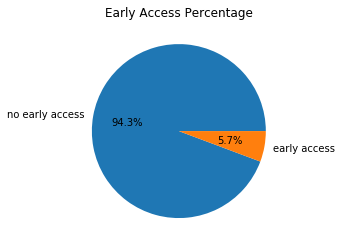

In [274]:
# Percentage of game that launch early access
percentage=df['early_access'].value_counts().values/len(df['early_access'])*100
labels='no early access','early access'
plt.title('Early Access Percentage')
plt.pie(percentage,labels=labels,autopct='%1.1f%%')

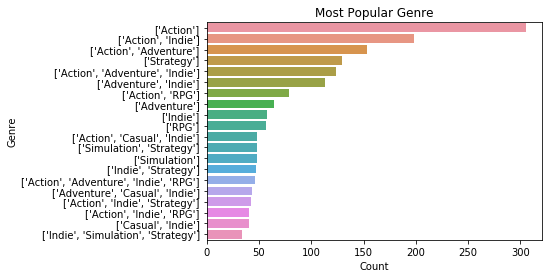

In [284]:
# Most Popular Genre
genres_count=unique_game['genres'].value_counts()[0:20]
plt.ylabel('Genre')
plt.xlabel('Count')
plt.title('Most Popular Genre')
sns.barplot(y=genres_count.index.astype(str),x=genres_count.values)

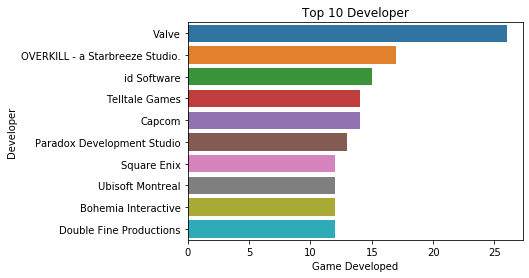

In [303]:
# Top 10 Developer
top_developer=unique_game['developer'].value_counts()[0:10]
plt.title('Top 10 Developer')
plt.xlabel('Game Developed')
plt.ylabel('Developer')
sns.barplot(y=top_developer.index.astype(str),x=top_developer.values)